In [2]:
## IMPORTS

import os
import sys
import re
import time
import math
from datetime import datetime
from io import StringIO


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from numpy.polynomial.polynomial import Polynomial
import scipy.integrate as integrate
import scipy.optimize as sco
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
import openpyxl
import networkx as nx
import sklearn.metrics
from IPython.core.display import HTML
import plotly.io as pio
from openpyxl.utils.dataframe import dataframe_to_rows
import openpyxl as opxl
import matplotlib.ticker as mtick
from matplotlib.cm import get_cmap
import time


sys.path.append(r'D:\seagu_OneDrive\Documents\GitHub\parallel-flow-distribution-pressure-loss\ansys')
sys.path.append(r'D:\seagu_OneDrive\Documents\GitHub\PVT-thermal-performance-model')
import jou_gen as jg
import ansys_py_bridge as apb
import ansys.fluent.core as pyfluent
import plot_bridge as pb
import model as ty
import proc as pr
import plot_functions_here as pfun
import heat_transfer as bht
import fluids as fds
import ht
import general as gen
folder_path = r'D:\ANSYS Fluent Projects\pvt_slice_outdoor\Fluent_GMI\tests'
hypotheses_path = folder_path + '\\' + 'Model_hypotheses.xlsx'
condi_path = folder_path + '\\' + 'test-Conditions-AR.xlsx'
geometry_path = folder_path + '\\' + 'Inputs_TEST_V4.5_GG.xlsx'
plot_path = folder_path + '\\' + 'Plot_hyp.xlsx'

hyp = pr.create_dict_from_excel(hypotheses_path,'Main')
steadyStateConditions_df = pd.read_excel(condi_path,header=2) ## Les deux première lignes ne sont pas à prendre
stepConditions = steadyStateConditions_df.to_dict(orient='records')
panelSpecs = pr.import_geometry(geometry_path)

plot_hyp = pr.create_dict_from_excel(plot_path,'Main')


In [ ]:
plot_hyp['method'] = 'case'
plot_hyp['no_case'] = 7
plot_hyp['no_mesh'] = 0
plot_hyp['nb_it']=7
plot_hyp

In [ ]:
# 'mesh' ou 'case'
ht_tot_mesh_case_list, ht_rad_mesh_case_list, ht_conv_mesh_case_list, CFD_mesh_case_list, df_one_mesh_case_list, slices_df_mesh_case_list, PyFluent_mesh_case_list = pb.get_data(plot_hyp, panelSpecs, hyp, stepConditions)

In [ ]:
# Cas 'mesh' ou 'case'
Qdot_tube_fluid, Qdot_top, Qdot_top_rad, Qdot_tube_back, Qdot_PV_sky = pb.calculate_Qdot(plot_hyp, panelSpecs, hyp, stepConditions, mesh = 0, case = 0, iteration = 0)

In [ ]:
# Cas 'ref
plot_hyp['method'] = 'ref'
ht_tot_AR_list, ht_rad_AR_list, ht_conv_AR_list, CFD_AR_list, df_one_AR_list, slices_df_AR_list, PyFluent_AR_list, ht_tot_uniform, ht_rad_uniform, ht_conv_uniform, CFD_uniform, df_one_uniform, slices_df_uniform, df_PyFluent_uniform, df_one_1D, slices_df_1D, df_PyFluent_1D = pb.get_data(plot_hyp, panelSpecs, hyp, stepConditions)

In [ ]:
Qdot = "Qdot_tube_fluid"
pb.plot_CFD_last_it(Qdot, plot_hyp, panelSpecs, hyp, stepConditions)
pb.plot_1D_last_it(Qdot, plot_hyp, panelSpecs, hyp, stepConditions)
pb.plot_big_it(Qdot, plot_hyp, panelSpecs, hyp, stepConditions)

In [ ]:
plot_hyp['method'] = 'case'
plot_hyp['no_case'] = 7
plot_hyp['no_mesh'] = 0
pb.plot_big_it('Qdot_top_rad', plot_hyp, panelSpecs, hyp, stepConditions) 

In [ ]:
pb.plot_profile_temp(plot_hyp, panelSpecs, hyp, stepConditions)

In [ ]:
plot_hyp['method'] = 'mesh'
plot_hyp['nb_cases'] = 5
plot_hyp['nb_mesh'] = 1
plot_hyp['nb_it'] = 1
plot_hyp['folder_mesh'] = 'Simu_1D_'
plot_hyp['folder_name'] = 'cas_'
plot_hyp['new_save'] = False
pb.plot_1D_DeltaT_tot('Qdot_tube_fluid', plot_hyp, panelSpecs, hyp, stepConditions)
# ht_tot_mesh_case_list, ht_rad_mesh_case_list, ht_conv_mesh_case_list, CFD_mesh_case_list, df_one_mesh_case_list, slices_df_mesh_case_list, PyFluent_mesh_case_list = pb.get_data(plot_hyp, panelSpecs, hyp, stepConditions)
# df_one_mesh_case_list[0][0][0]

In [ ]:
plot_hyp['method'] = 'case'
plot_hyp['no_case'] = 7
plot_hyp['no_mesh'] = 0
plot_hyp['nb_it']=7
plot_hyp['folder_mesh'] = 'Simu_M'
plot_hyp['folder_name'] = 'cas_'
plot_hyp['new_save'] = False
pb.plot_CFD_last_it('Qdot_tube_fluid', plot_hyp, panelSpecs, hyp, stepConditions)

In [ ]:
plot_hyp['method'] = 'mesh'
plot_hyp['nb_cases'] = 3
plot_hyp['nb_mesh'] = 4
plot_hyp['nb_it'] = 1
plot_hyp['folder_mesh'] = 'Simu_uniform'
plot_hyp['folder_name'] = 'cas_M'
plot_hyp['new_save'] = False
nb_mesh = plot_hyp['nb_mesh']
nb_cases = plot_hyp['nb_cases']

for mesh in range(nb_mesh):
    for case in range(nb_cases):
        ratio_rad, ratio_conv = pb.rad_conv_ratio(plot_hyp, panelSpecs, hyp, stepConditions, mesh, case, -1)
        print(f'ratio_rad = {ratio_rad}, ratio_conv = {ratio_conv}, Simu_uniform{mesh+1}, cas_M{case}')

In [5]:
plot_hyp['method'] = 'mesh'
plot_hyp['nb_cases'] = 3
plot_hyp['nb_mesh'] = 5
plot_hyp['nb_it'] = 1
plot_hyp['folder_mesh'] = 'Simu_uniform'
plot_hyp['folder_name'] = 'cas_M'
plot_hyp['new_save'] = False
pb.plot_CFD_last_it('Qdot_top_conv', plot_hyp, panelSpecs, hyp, stepConditions)

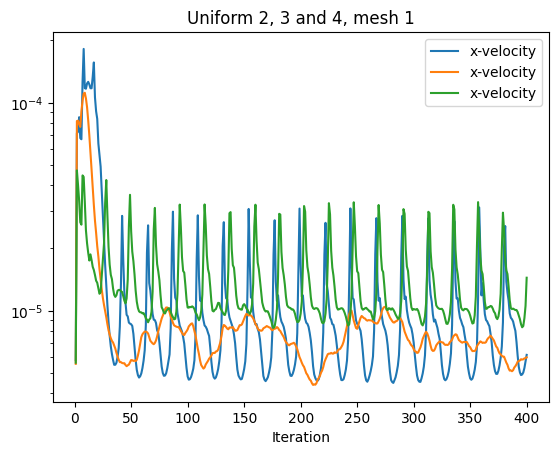

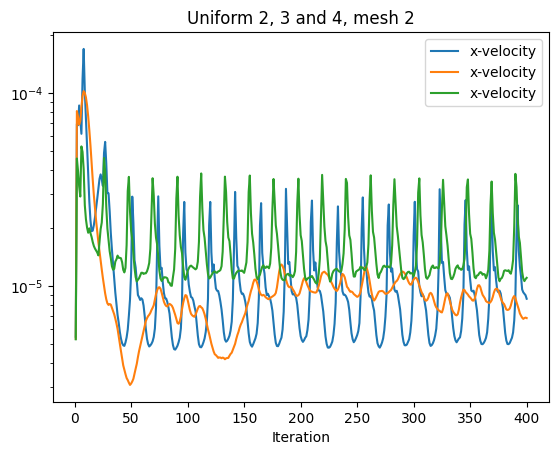

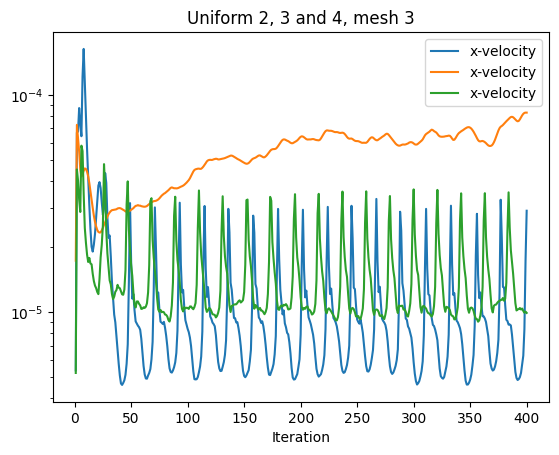

In [8]:

file_name = 'residuals_cas_ref_CFD_uniform.txt'
residual = 1
for j in range(3) :
    fig, ax = plt.subplots()
    file_path_base = r'D:\ANSYS Fluent Projects\pvt_slice_outdoor\Fluent_GMI\tests' + '\\' + f'Simu_uniform2\cas_M{j}'
    file_path = os.path.join(file_path_base, file_name)
    residuals2 = pb.extract_residuals(file_path)
    file_path_base = r'D:\ANSYS Fluent Projects\pvt_slice_outdoor\Fluent_GMI\tests' + '\\' + f'Simu_uniform3\cas_M{j}'
    file_path = os.path.join(file_path_base, file_name)
    residuals3 = pb.extract_residuals(file_path)
    file_path_base = r'D:\ANSYS Fluent Projects\pvt_slice_outdoor\Fluent_GMI\tests' + '\\' + f'Simu_uniform4\cas_M{j}'
    file_path = os.path.join(file_path_base, file_name)
    residuals4 = pb.extract_residuals(file_path)
    residuals2[residual].plot(ax= ax, logy=True, legend = True)
    residuals3[residual].plot(ax= ax, logy=True, legend = True)
    residuals4[residual].plot(ax= ax, logy=True, legend = True)
    ax.set_title(f'Uniform 2, 3 and 4, mesh {j+1}')
    ax.set_xlabel('Iteration')
    plt.show()
    # pd.DataFrame(residuals[4] residuals[0]).plot(logy=True, legend = True, title = f'Uniform {i}, cas {j}')

In [ ]:
plot_hyp['method'] = 'case'
plot_hyp['no_case'] = 7
plot_hyp['no_mesh'] = 0
plot_hyp['nb_it']= 1
plot_hyp['folder_mesh'] = 'Simu_CFD'
plot_hyp['folder_name'] = 'cas_'
plot_hyp['new_save'] = False
pb.compute_quality(plot_hyp, panelSpecs, hyp, stepConditions)